# Linear Regression in Python (SLR & MLR) 

<b><i>Note</i></b>: This tutorial has slight differences from my R tutotrial on linear regression. This is due to diffrent implementations of the linear model between Scikit-Learn and R as well as the diffrences between random_state vs set.seed().<br>

Also, R is more statistically oriented than Pythons Scikit-Learn (which is used more for practical machine learning). Thus, unlike the R tutorial that has a model summary( .describe() ), in Scikit-Learn we don't. So here I stick to the main attributes.<br>

This is one of the areas where you start to see the diffrences between both languages and why it's important to know both of them for data science.<br>

Although, I will state that there is a way to get close to the R summary output via the Scipy Stats module, which also has a LinearRegression model. In the future I might add an additional tutorial on it.

### Scenario <br>

<p>"Burger Slim" network wants to launch a new kids meal. They want to predict how different meal combinations affect revenue in each of their 2000 branches via linear regression. </p>

The features they chose for the modal are: <br>

<img src="Burger_Slim.png"> <br>

Lets get to it!

In [1]:
#Loading relevant modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\net70\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
myData = pd.read_csv("burgers2000.csv")
myData.head()

,price,size_beverage,salad,ice_cream,toy,revenue
0,3.546357,0.6,1,0,1,34957.85537
1,4.179821,0.7,0,0,1,50046.82075
2,3.634045,0.6,0,0,0,41464.24088
3,4.166024,0.7,1,1,0,43034.23901
4,4.139435,0.7,1,0,0,34856.39879


In [3]:
# Validating the data set
np.unique(myData.isnull())

array([False], dtype=bool)

Ok, Let's take a look at our data and <i>see</i> if we can spot any corelations right off the start. 

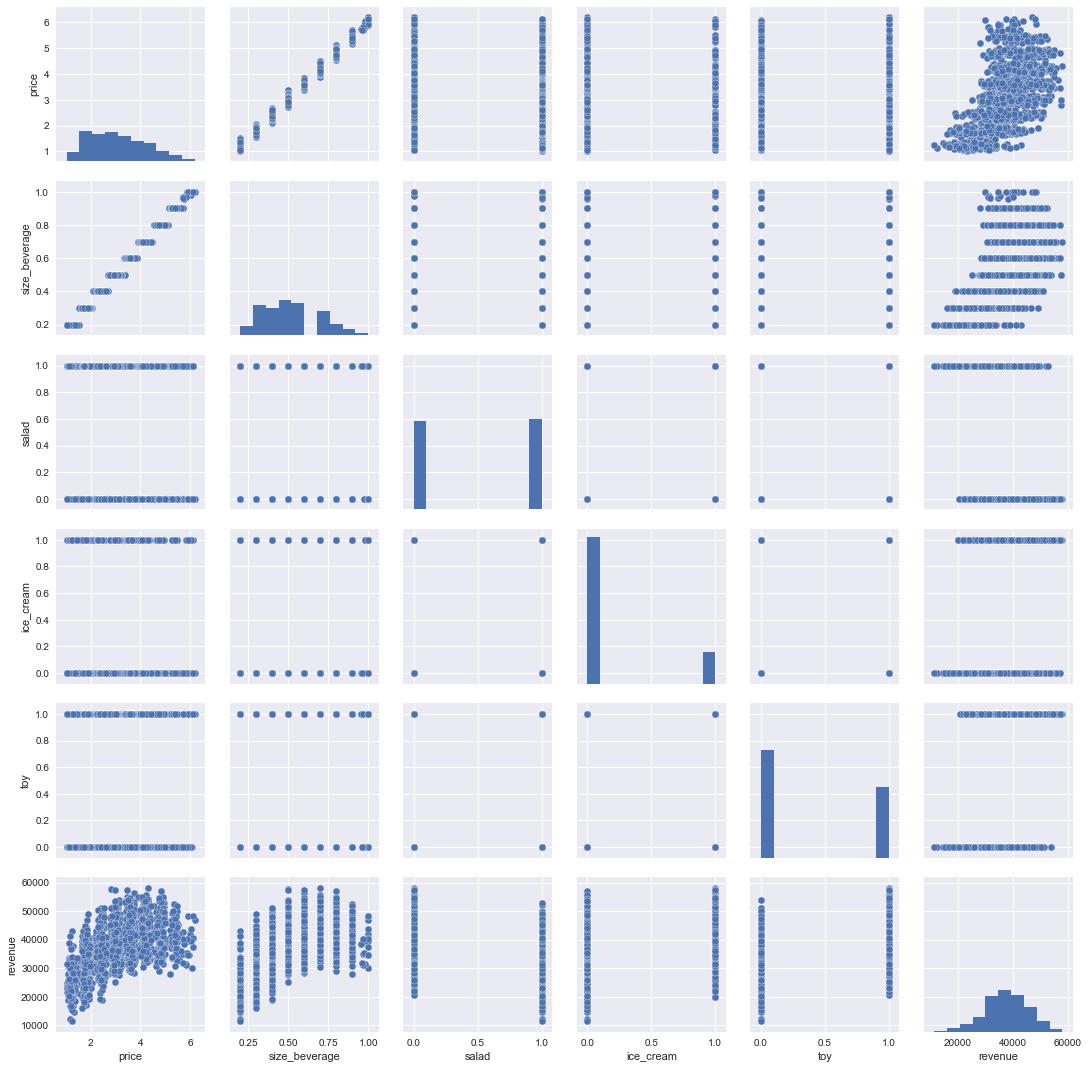

In [4]:
sns.pairplot(myData)

Considering that this is still data science, let's get the corelations in numbers.

In [5]:
# Corelation of revenue and price.
np.corrcoef(myData["revenue"], myData["price"])[0,1]

0.55747001505907645

In [6]:
# Corelation of revenue and size_beverage.
np.corrcoef(myData["revenue"], myData["size_beverage"])[0,1]

0.56061826129089198

In [7]:
# Corelation of revenue and salad.
np.corrcoef(myData["revenue"], myData["salad"])[0,1]

-0.47554274027151006

In [8]:
# Corelation of revenue and ice_cream.
np.corrcoef(myData["revenue"], myData["ice_cream"])[0,1]

0.19937391669165472

In [9]:
# Corelation of revenue and toy.
np.corrcoef(myData["revenue"], myData["toy"])[0,1]

0.39397630503772962

<p>We can easly see that there is positive linear corelation between revenue and price/size_beverage. Also a negative linear corelation between revenue and salad. Although, note that the corelations aren't that strong.</p>

This pretty much makes sense, as kids like more quantity in thier bevarage and toys (thus making the meal cost more), alongside having a dislike to vegitables.

### Splitting the Data (train & test)<br>

Ok, so up until now we really just kind of did a quick review of the data. It's time to dig a little deeper in order to get much more accurate and reliable conclusions. <br>

First off, we will split our data into training & testing sets (70/30) in order to avoid overfitting.

In [10]:
# We're setting random_state equal to 1234 in order to keep consistency among peers.
x_train, x_test, y_train, y_test = train_test_split(myData['price'], myData["revenue"], 
                                                    test_size=0.3, random_state=1234) 
# Reshaping our sets to fit the LinearRegression model 
x_train =x_train.values.reshape(len(x_train), 1)
x_test =x_test.values.reshape(len(x_test), 1)
y_train =y_train.values.reshape(len(y_train), 1) # Only 1 feature, no need for length.
y_test =y_test.values.reshape(len(y_test), 1)

In [11]:
# checking that our sets are of same sizes.
print(len(x_test), len(y_test))
print(len(x_train), len(y_train))

600 600
1400 1400


### Simple Linear Regression (SLR)<br>

Alright, everything from validating to splitting our data is set! We're ready to fit the sets into the first model we're looking at (SLR). <br>

SLR means that we want to explain our dependent variable via a single independent variable. In our case this means we want to see how one of our features, now price, predicts revenue. <br>

This is done through the simple linear equation we all learned in high school, <b>Y=m&#8727;X+b</b>. Where <b>Y</b> is revenue, <b>X</b> is price, <b>m</b> is the <i>average</i> increase we get in every increament of x and <b>b</b> is the intercept with the y axis.   

In [12]:
# lm stands for linear model.
lm1 = LinearRegression(normalize=True) # normalizing the data, very important!
lm1.fit(x_train, y_train)
# Intercept is our b
lm1.intercept_ 

array([ 25776.4503497])

In [13]:
# This is our m
lm1.coef_

array([[ 3817.75880037]])

In [14]:
# The R-squared for our model.
lm1.score(x_train, y_train)

0.31180586641799679

Let's take a look at what we got here.

By the values showen above we get that our equation is as follows, <i><b>revenue</b> = 3817.75880037&#8727;<b>price</b> + 25776.4503497 .</i>
But what does this mean? Well, our itercept is positive and means that each value of X will get an adjusment of + 25776.4503497 <b>(note: if X cannot be zero like in our case, the intercept is meaningless)</b>. Also, our <i>slope</i>(m) is 3817.75880037. This means that for every increase in price we get an increase of 3817.75880037 to the revenue. 

C:\Users\net70\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


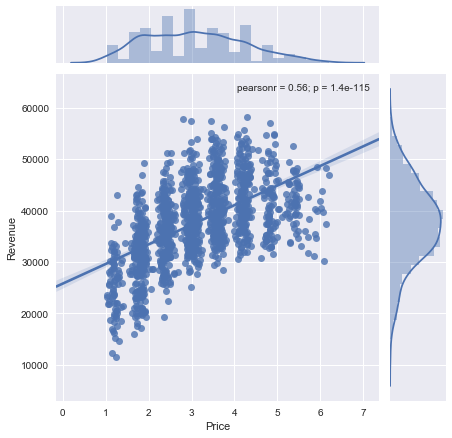

In [15]:
sns.jointplot(x_train, y_train, kind="reg")
plt.xlabel('Price')
plt.ylabel('Revenue')

#### Final Conclusions<br>

Ok, so we know what our model looks like based off the training set, but is it any good? well, not really.<br>

Why? because our R-squared value is only 0.3118. This means that our model is only able to explain 31.18% of the increase in revenue and this was on the training set alone. <br>

Whenever we get a not-great model for our data in the training stage, there's no point in trying it on the test set seeing that it will provide results of the same (if not worse) value.<br>

Luckily, we have plenty more features to help of improve our model! So now we're going to utilize Multiple Linear Regression (MLR). 

### Multiple Linear Regression (MLR)<br>

MLR is very similar to SLR, except now we can use more than one feature in order to predict our dependant variable (revenue).<br>

So now, instead of having Y=mX+b, we get <i>Y = b + m1&#8727;feature1 + m2&#8727;feature2...</i> and so on.<br>

Let's try it out. We saw earlier that the feature size_beverage was also rather highly corelated to revenue, so we'll add that into our model.<br>

In [16]:
# We now need to include all of our features in the taining and testing sets.
# We're setting random_state equal to 1234 in order to keep consistency among peers.
x_train, x_test, y_train, y_test = train_test_split(myData.drop(['revenue'], 1), myData["revenue"], 
                                                    test_size=0.3, random_state=1234) 

In [17]:
lm2 = LinearRegression(normalize=True)
lm2.fit(x_train[['price', 'size_beverage']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [18]:
'And an R-squared: {}'.format(round(lm2.score(x_train[['price', 'size_beverage']], y_train), 4))

'And an R-squared: 0.3148'

Looking at our new MLR model, we get a somewaht weird result. If you noticed, unlike in our SLR model, suddenly the price feature became insignificant with a negative slope. Alas, the models result is pretty much the same. R-squared seems to be almost of same value as before. What does all this mean?<br>

##### Multicollinearity<br>

If you scroll back up you'll see in our piarplot(scatterplot matrix) that the features size_beverage and price are very strongly corelated. In fact they are 0.996037417630387 corelated ( np.corrcoef(myData["size_beverage"], myData["price"])[0,1] ).<br>

That means they're so close together that the model has a hard time determining which one of them is giving a greater impact on revenue. More over, this shows you that "too many cooks can ruin a dish". This is why you always want to look at all aspects of your data.

You can read more on the subject at <a href="http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis">Minitab: Handling Multicollinearity in Regression Analysis</a><br>

Let's try out two new models of MLR containing the rest of our features, but in one we'll exclude the price feature and in the other we'll exclude the size_beverage feature.

In [19]:
lm3 = LinearRegression(normalize=True)
lm3.fit(x_train.drop(['size_beverage'], 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [20]:
#     lm3 R-squared value          The intercept   the coeffcients(slopes)
print(lm3.score(x_train.drop(['size_beverage'], 1), y_train), lm3.intercept_, lm3.coef_)

0.738127104146 25888.0295276 [ 4028.90157872 -7451.30721923  3549.79046354  6101.15664978]


Ok, so far we get much better results! R-squared is 0.7381, meaning our model was able to explain correctly 73.81% of the depandent variable revenue.<br>

So looking at our equation now, it is as follows: <i><b>revenue</b> = 25888.0295 + 4028.9015&#8727;<b>price</b> - 7451.3072&#8727;<b>salad</b> + 3549.7904&#8727;<b>ice_cream</b> + 6101.1566&#8727;<b>toy</b></i> <br>
Meaning that where a boolian feature is present in a data point, it's estimator will add to revenue, and the opposite will occur when it's not present in the data point.<br>

for example: A meal with a price of 4.5 that comes with a toy and without ice_cream and salad would yield <i><b>revenue</b> = 25888.0295 + 4028.9015&#8727;<b>4.5</b> - 7451.3072&#8727;<b>0</b> + 3549.7904&#8727;<b>0</b> + 6101.1566&#8727;<b>1</b> = 50119.2432</i><br>


Let's see how the second model holds up.

In [21]:
lm4 = LinearRegression(normalize=True)
lm4.fit(x_train.drop(['price'], 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
#     lm3 R-squared value          The intercept   the coeffcients(slopes)
print(lm4.score(x_train.drop(['price'], 1), y_train), lm4.intercept_, lm4.coef_)

0.741701186796 25758.6539783 [ 24472.08026775  -7467.55513353   3525.77980517   6102.90624288]


We seem to have slightly better results in this model then in our previous model.<br>

Ok, so we're almost done. We just need too look at one more imprtant thing regardong oir models.<br>

#### Root Mean Squared Error (RMSE)<br>

The square root of the mean/average of the square of all of the error. In simplicity, it indicates on avarage how far each real data point is from the prediction line (how far off we are).<br>
We want the model that has the smallest RMSE and highest R-squared. So we'll find out via the test sets. 

In [23]:
# Adding each models prediction to the original data set.
myData['predict2'] = lm2.predict(myData[['price', 'size_beverage']])
myData['predict3'] = lm3.predict(myData[['price', 'salad', 'ice_cream', 'toy']])
myData['predict4'] = lm4.predict(myData[['size_beverage', 'salad', 'ice_cream', 'toy']])
myData.head()

,price,size_beverage,salad,ice_cream,toy,revenue,predict2,predict3,predict4
0,3.546357,0.6,1,0,1,34957.85537,39587.996240,38825.803265,39077.253248
1,4.179821,0.7,0,0,1,50046.82075,41888.586482,48829.273297,48992.016409
2,3.634045,0.6,0,0,0,41464.24088,39539.460847,40529.239528,40441.902139
3,4.166024,0.7,1,1,0,43034.23901,41896.223264,38771.012298,38947.334837
4,4.139435,0.7,1,0,0,34856.39879,41910.940062,35114.099296,35421.555032


In [24]:
from numpy import mean, sqrt

RMSE2 = sqrt(mean((myData['revenue']-myData['predict2'])**2))
RMSE3 = sqrt(mean((myData['revenue']-myData['predict3'])**2))
RMSE4 = sqrt(mean((myData['revenue']-myData['predict4'])**2))
print('Model 2: R-squared: ',lm2.score(x_test[['price', 'size_beverage']], y_test), 'RMSE: ', RMSE2)
print('Model 3: R-squared: ',lm3.score(x_test[['price', 'salad', 'ice_cream', 'toy']], y_test), 'RMSE: ', RMSE3)
print('Model 4: R-squared: ',lm4.score(x_test[['size_beverage', 'salad', 'ice_cream', 'toy']], y_test), 'RMSE: ', RMSE4)

Model 2: R-squared:  0.310074666948 RMSE:  6402.41988741
Model 3: R-squared:  0.760197109673 RMSE:  3904.39302378
Model 4: R-squared:  0.761058526316 RMSE:  3883.15311056


Seems we have a winner!<br>

with an RMSE = 3883.1531 and a R-squared = 0.76105, model4 takes the cake despite being only slightly better than model3.